# Module 122 (DS12)
### - Hypothesis Tests that aren't T tests
### - Variance, Std Dev, Std Error of the Mean, Degrees of Freedom
### - Confidence Intervals - calculate, interpret, graphically represent

Key Insights: 

confidence interval = mean +- (t * stderr)

One does chi^2 tests on "contingency tables" (hello pd.crosstab) that have a variable on each axis

scipy.stats is the place to go

### Study topics:

- What is a sample "estimate" in statistics?
__A sample estimate is an estimate of a population parameter, based on only your sample. For example, if I have a sample mean, that is an estimate of the population mean.__

- What are hypothesis test? How are they useful?
__Hypothesis tests examine the likelihood that divergence from an expected "null" hypothesis could be due to random chance. They allow us to determine whether an apparently interesting result -- say, a drug treatment group outperforming a placebo -- is significant, or could still just be due to chance.__

- What is a "null hypothesis?"
__A made up, expected result. The "uninteresting" result. "Nothing to see here."
"The average of this sample is the same as the average of the population from whence it came."__

- What is a p-value and what does it represent?
__The likelihood that the result could be due to random chance, i.e. is insignificant__

- What does it mean for something to be "statistically significant?"
__There is an acceptably low likelihood that the thing was due to random chance. (This has nothing to do with impact size, which is "how much the difference is".)__

- What is a test statistic and how does it relate to a p-value?
__The t statistic is how many standard deviations you are away from the mean. Positive is greater than the mean; negative, less than. You use the t stat and the degrees of freedom to find your p-value. More degrees of freedom makes the t distribution approach the standard normal distribution, which uses z scores.__

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?
__Degrees of freedom = sample size - however many population parameters you estimated n. Each number in the sample is free to vary except the final n numbers because they must be certain things to make the estimate true.__
-__1sample --> n - 1__
-__2sample --> n - 1 where n is the smaller sample__
-__chi^2 --> (rows - 1) * (columns - 1)__

In [7]:
# Chi square

import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Takes crosstab/table and tests independence of rows/cols

# null = independent -> low stat
# alternative = dependence -> high stat

# Says nothing about direction of causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print('Chi square results: ', chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print('Chi square results: ', chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Chi square results:  Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Chi square results:  Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [ ]:
# Distribution test - checks if something is normal

# null = normal
# reject the null = not normal

from scipy.stats import normaltest
# Poisson is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))

# The Poisson distribution is not the normal distribution

NormaltestResult(statistic=18.335645656323976, pvalue=0.00010434343620316735)


In [ ]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/recommendations
# The underlying math comes from chi-square distribution, is best when n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print('x1 y1 result: ', kruskal(x1, y1))  # We know x1 ranks higher, but not significant

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # A third group, of different size
print('x2 y2 z result: ', kruskal(x2, y2, z))  # x clearly dominates

x1 y1 result:  KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
x2 y2 z result:  KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive. Knowing them by heart isn't important; looking them up is

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means (don't affect each other)

    - Ensure via random sample (which we did not do).
   
- "Homogeneity" of Variance?

    - i.e. roughly the same variance (OK on this with the voting data, although could probably be better since one party was larger)
    - Welch's T if problem here
    
- "Dependent Variable" (sample means) are Distributed Normally
    - Ensure via big sample
    - <https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>
    - Lots of tests depend on normal distributions. Can test for normality as shown above.
    - Often assumed even if weak. Can transform data to normal if needed. Typically goes away for large sample sizes (thanks to Central Limit Theorem) and is why you don't hear it brought up. People just declare it satisfied. 

### Central Limit Theorem
No matter the initial distribution of the population, the distribution of sample means will approximate normal as $n \rightarrow \infty$.

This is huge for hypothesis testing and is why t approximates z as sample size increases 


In [ ]:
# think of the Galton board

In [20]:
# Do a 3000-trial experiment of 12 coin flips each, plot the mean of each trial

import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')


sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print('First 10 sample means: ', sample_means[:10])

First 10 sample means:  [0.4166666666666667, 0.25, 0.4166666666666667, 0.75, 0.5, 0.5, 0.6666666666666666, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334]


number coinflips:  12


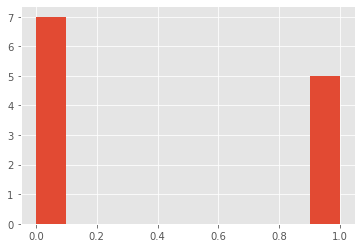

In [17]:
# Single trial

df = pd.DataFrame({'single_sample': one_sample})
print('number coinflips: ', len(df))

df.single_sample.hist();

Num sample means:  3000


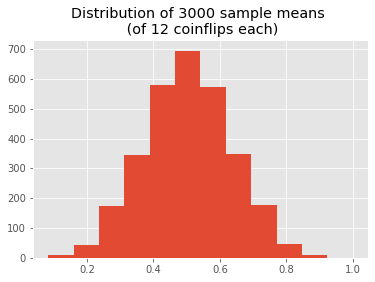

In [21]:
# All trials
print('Num sample means: ', len(sample_means))

ax = plt.hist(sample_means, bins=12)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

In [31]:
# Central limit Theorem pulls sample means toward normal distribution

sample_means_small = []
sample_means_large = []
sample_means_huge = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=10)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  coinflips_huge = np.random.binomial(n=1, p=.5, size=1000)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  one_huge_sample = coinflips_huge
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())
  sample_means_huge.append(coinflips_huge.mean())

print('Some means at sample size: \n')
print('20: ', sample_means_small[:10])
print('100: ', sample_means_large[:10])
print('1000: ', sample_means_huge[:10])

Some means at sample size: 

20:  [0.8, 0.5, 0.4, 0.5, 0.8, 0.6, 0.4, 0.4, 0.4, 0.5]
100:  [0.56, 0.45, 0.53, 0.51, 0.4, 0.46, 0.48, 0.5, 0.52, 0.46]
1000:  [0.506, 0.509, 0.516, 0.5, 0.498, 0.48, 0.507, 0.51, 0.506, 0.517]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

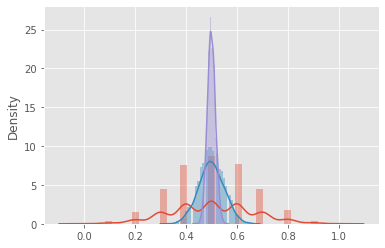

In [34]:
# Show visually

import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large, sample_means_huge]:
  sns.distplot(sample)

smaller sample = more randomness in the estimation

## Standard Error of the Mean

- the standard deviation of the distribution of sample means. Describes how random our estimate is.

StdDev of sample: s

Standard Error: s / sqrt(n) 

In other words, the sample mean is likely to vary within certain bounds

![Sample vs Population Variance](https://standard-deviation-calculator.com/wp-content/uploads/2018/03/sample-variance-formula-descriptive-statistics-54-638-cb1374419364.jpg)

## How do "Degrees of Freedom" work?

In [36]:
# I have already estimated the sample mean
# sample mean: 22 (This is locked in place, this is my constraint)

final_number_in_sample = 10
fake_sample = [16, 35, 8, 12, 60, 13, final_number_in_sample]

# What does the 7th value have to be in order to maintain a sample size of 22?

# 22*7 = 154
# 154 - 144 = 10

np.mean(fake_sample)

# The last value is always locked in place, unlike the first n - 1

22.0

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>


$\bar{X}$ - Sample Mean

$t$ - t stat corresponding to 95% confidence level and a certain dof

$s$ - Std Dev sample

$n$ - Sample size

In [37]:
import scipy.stats as stats

# Pandas by default calculates *SAMPLE standard deviation* 
# (n-1 degrees of freedom)

# NumPy by default calculates *POPULATION* standard deviation 
# (n degrees of freedom)

# Be conscious of which libary you are using to calculate std & var

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval, default 95%
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # Numpy by default calculates the population std_dev
  # The following line is wrong:
  # s = np.std(data) 
  # We want the "sample" std_dev
  s = np.std(data, ddof=1) # uses n-1 in the denominator "denominator dof"
  std_err = s / np.sqrt(n)
  margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [38]:
coinflips = np.random.binomial(n=1, p=.5, size=60)

confidence_interval(coinflips)

(0.6, 0.4723779547394681, 0.7276220452605319)

In [ ]:
coinflips = np.random.binomial(n=1, p=.5, size=10000)

confidence_interval(coinflips)

(0.5052, 0.4953990336740798, 0.5150009663259202)

## Graphically Represent a Confidence Interval

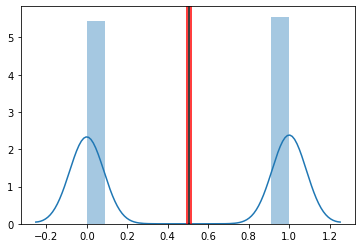

In [ ]:
import seaborn as sns

sns.distplot(coinflips)
CI = confidence_interval(coinflips)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside "FAILS TO REJECT"

A sample mean that falls outside "REJECTS"

## Some more messing around...
## - Chi^2 by hand and in Scipy
## - CI by hand

In [ ]:
from scipy.stats import t, ttest_1samp
import numpy as np

# 100-trial experiment of 30 coinflips each

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.5333333333333333, 0.4666666666666667, 0.5666666666666667, 0.6, 0.43333333333333335, 0.6, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.5666666666666667, 0.4666666666666667, 0.43333333333333335, 0.5, 0.5, 0.5333333333333333, 0.4666666666666667, 0.6, 0.36666666666666664, 0.4666666666666667, 0.5, 0.43333333333333335, 0.6333333333333333, 0.43333333333333335, 0.43333333333333335, 0.5, 0.5666666666666667, 0.4, 0.43333333333333335, 0.5, 0.5666666666666667, 0.5, 0.5, 0.36666666666666664, 0.4666666666666667, 0.6333333333333333, 0.36666666666666664, 0.5333333333333333, 0.6, 0.7, 0.6, 0.4666666666666667, 0.5666666666666667, 0.43333333333333335, 0.5, 0.6666666666666666, 0.4666666666666667, 0.43333333333333335, 0.6, 0.4, 0.5333333333333333, 0.4666666666666667, 0.5, 0.43333333333333335, 0.43333333333333335, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.36666666666666664, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.46666666666

In [ ]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.487616819921211, 0.5190498467454558)


In [ ]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
# ppf
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.487616819921211, 0.5190498467454558)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [ ]:
ttest_1samp(coinflip_means, .4876169)

Ttest_1sampResult(statistic=1.984206841525219, pvalue=0.050001144883009614)

A null hypothesis that's just outside of our confidence interval == reject



In [ ]:
ttest_1samp(coinflip_means, .4876167)

Ttest_1sampResult(statistic=1.9842320916159935, pvalue=0.049998285555303716)

The bound of the confidence interval are the bounds of statistical significance of a t-test. 

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

## Run a $\chi^{2}$ Test using Scipy

A chi^2 test, tests to see if two **CATEGORICAL** variables are independent or dependent.

$H_0$: The two variables are independent

$H_a$: The two variables are dependent (related, correlated, associated)

chi^2 statistic: Are the proportions across categories similar to the proportions within categories? If yes - independent, if no - dependent (related)

In [ ]:
import numpy as np
# comes from a crosstab (sample)
contingency_table = np.array([[90,60,104,95],
                              [30,50,51,20],
                              [30,40,45,35]])

chi_2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(chi_2_stat, p_value, dof, expected)

NameError: ignored

In [ ]:
print("Chi^2 Statistic", chi_2_stat, "\nP value", p_value, "\nDOF", dof, "\nExpected", expected)

Chi^2 Statistic 24.5712028585826 
P value 0.0004098425861096696 
DOF 6 
Expected [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


Based on a chi^2 statistic of 24.6 and a p-value of .0004, I reject the null hypothesis that neighborhood and work type are independent, and suggest the alternative that they are associated. 

### Degrees of Freedom

With chi^2 tests, the degrees of freedom:

(# rows in contingency table - 1)(# columns in contingency table - 1)

In [ ]:
print("Degrees of Freedom", dof)

Degrees of Freedom 6


In [ ]:
# What I would expect the values in my contingency table to be
# if the null hypothesis were true
print("Expected Value Table", expected)

Expected Value Table [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
